### Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
premium_df = pd.read_csv(r'D:\Downloads\insurance.csv')
premium_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df = premium_df.copy()

In [4]:
premium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
premium_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
premium_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
for i in premium_df.columns:
    print(f'The unique values in feature {i}',premium_df[i].unique(),sep='\n')
    print('----------------------------------------------------------')

The unique values in feature age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
----------------------------------------------------------
The unique values in feature sex
['female' 'male']
----------------------------------------------------------
The unique values in feature bmi
[27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30.3 16.  33.3 29.2 26.4 30

### EDA Start

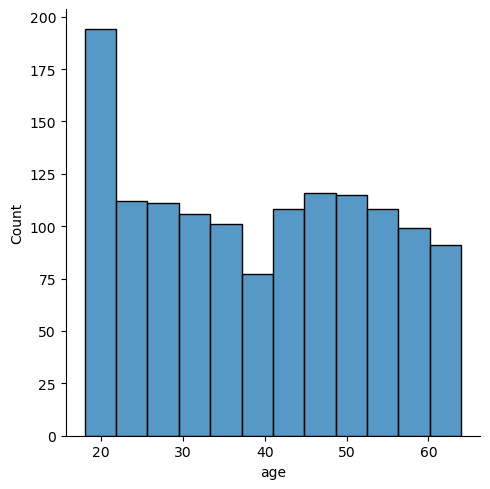

In [8]:
sns.displot(premium_df['age'])

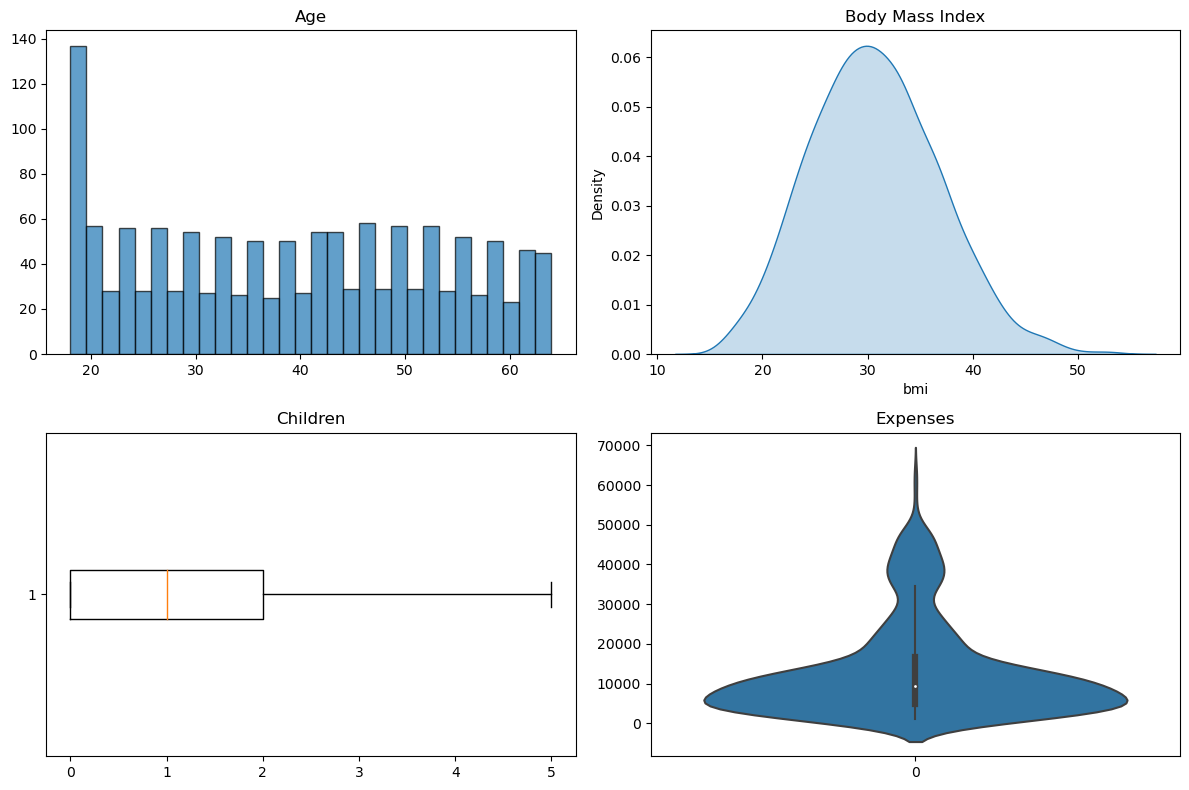

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Histogram
axes[0, 0].hist(premium_df['age'], bins=30, edgecolor='k', alpha=0.7)
axes[0, 0].set_title('Age')

# Plot 2: KDE Plot
sns.kdeplot(premium_df['bmi'], shade=True, ax=axes[0, 1])
axes[0, 1].set_title('Body Mass Index')

# Plot 3: Box Plot
axes[1, 0].boxplot(premium_df['children'], vert=False)
axes[1, 0].set_title('Children')

# Plot 4: Violin Plot
sns.violinplot(premium_df['expenses'], ax=axes[1, 1])
axes[1, 1].set_title('Expenses')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()




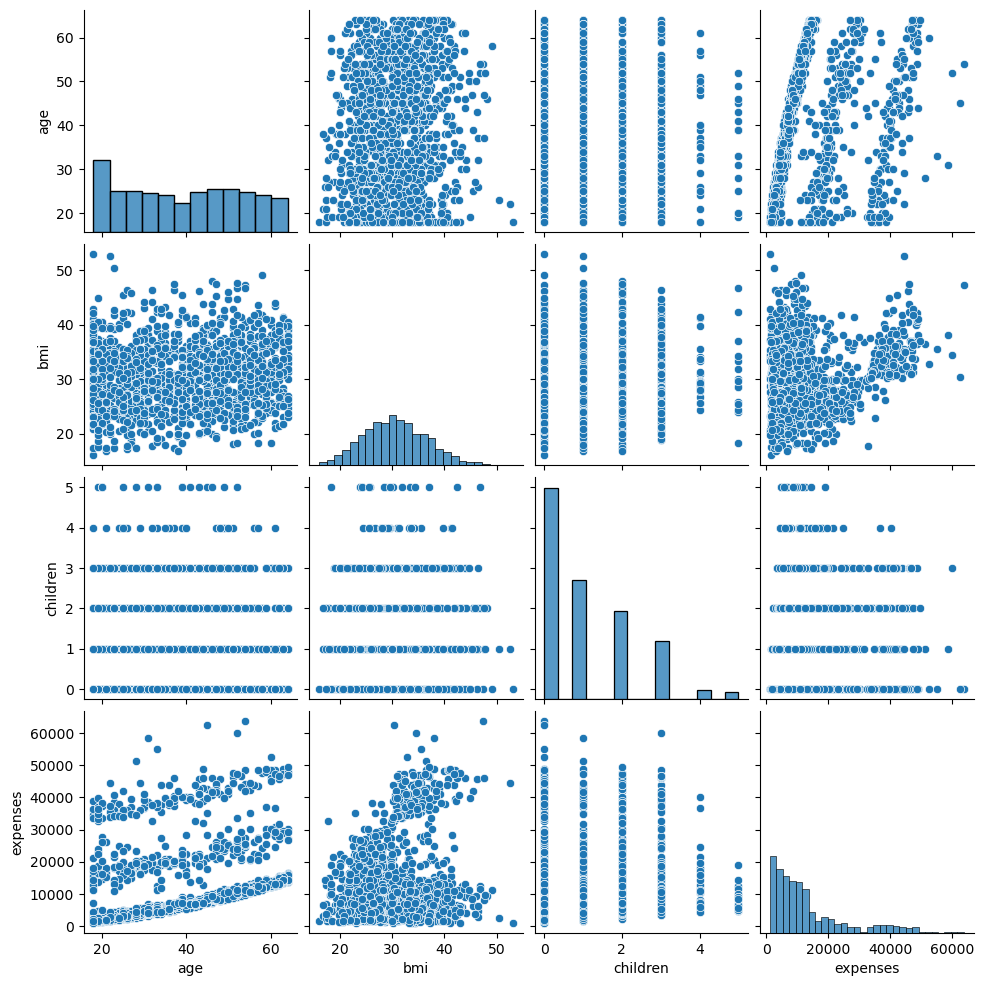

In [10]:
sns.pairplot(premium_df, palette='red')

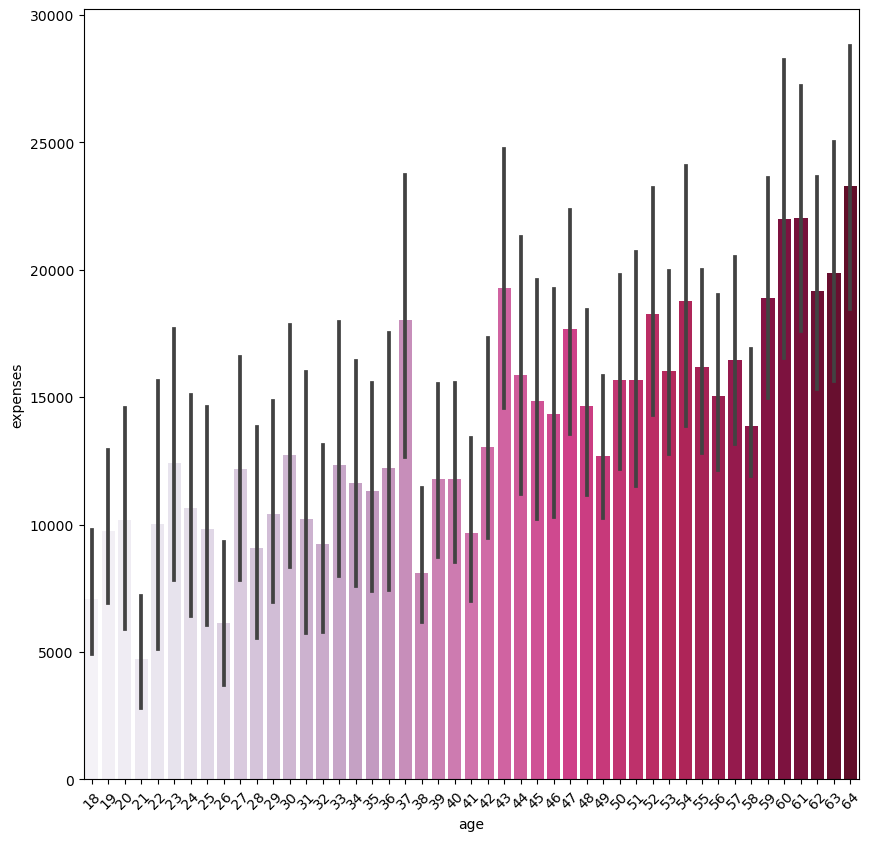

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(x='age',y='expenses',data=premium_df,palette='PuRd')
plt.xticks(rotation = 45)
plt.show()

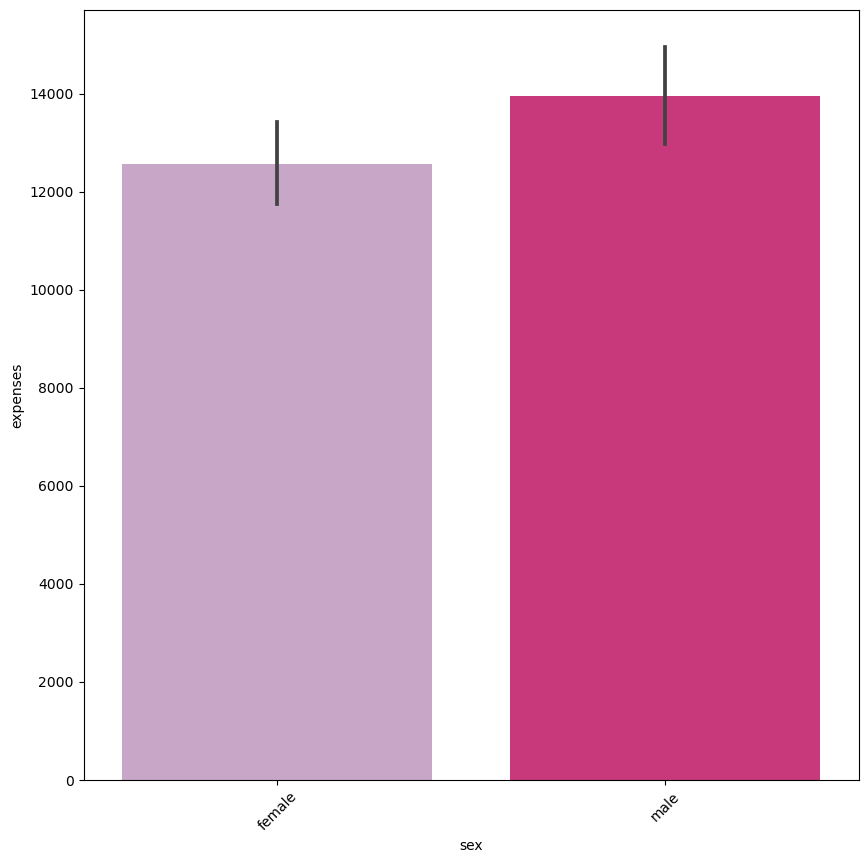

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x='sex',y='expenses',data=premium_df,palette='PuRd')
plt.xticks(rotation = 45)
plt.show()

In [13]:
premium_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

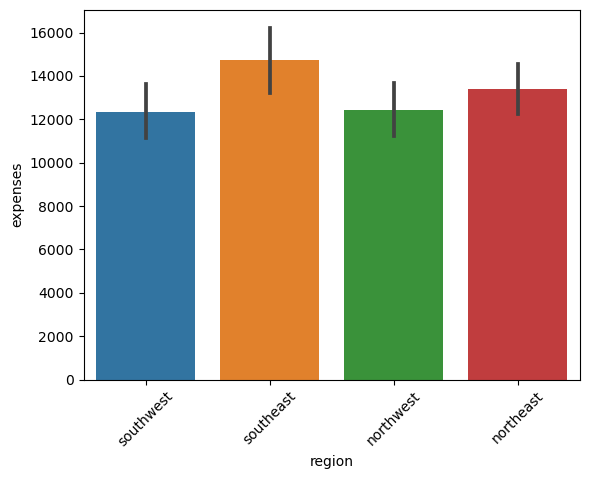

In [14]:
#plt.figure(figsize=(10,10))
sns.barplot(x='region',y='expenses',data=premium_df)
plt.xticks(rotation = 45)
plt.show()

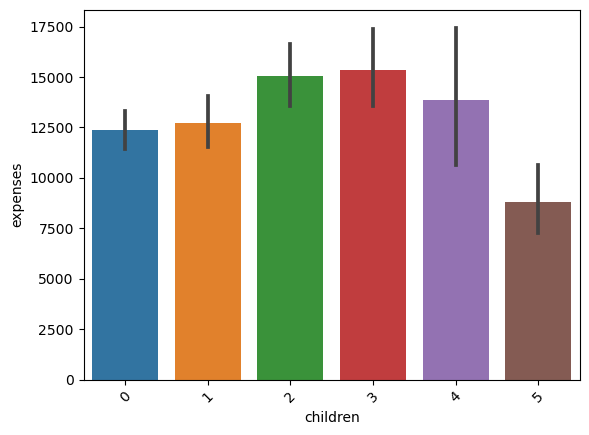

In [15]:
sns.barplot(x='children',y='expenses',data=premium_df)
plt.xticks(rotation = 45)
plt.show()

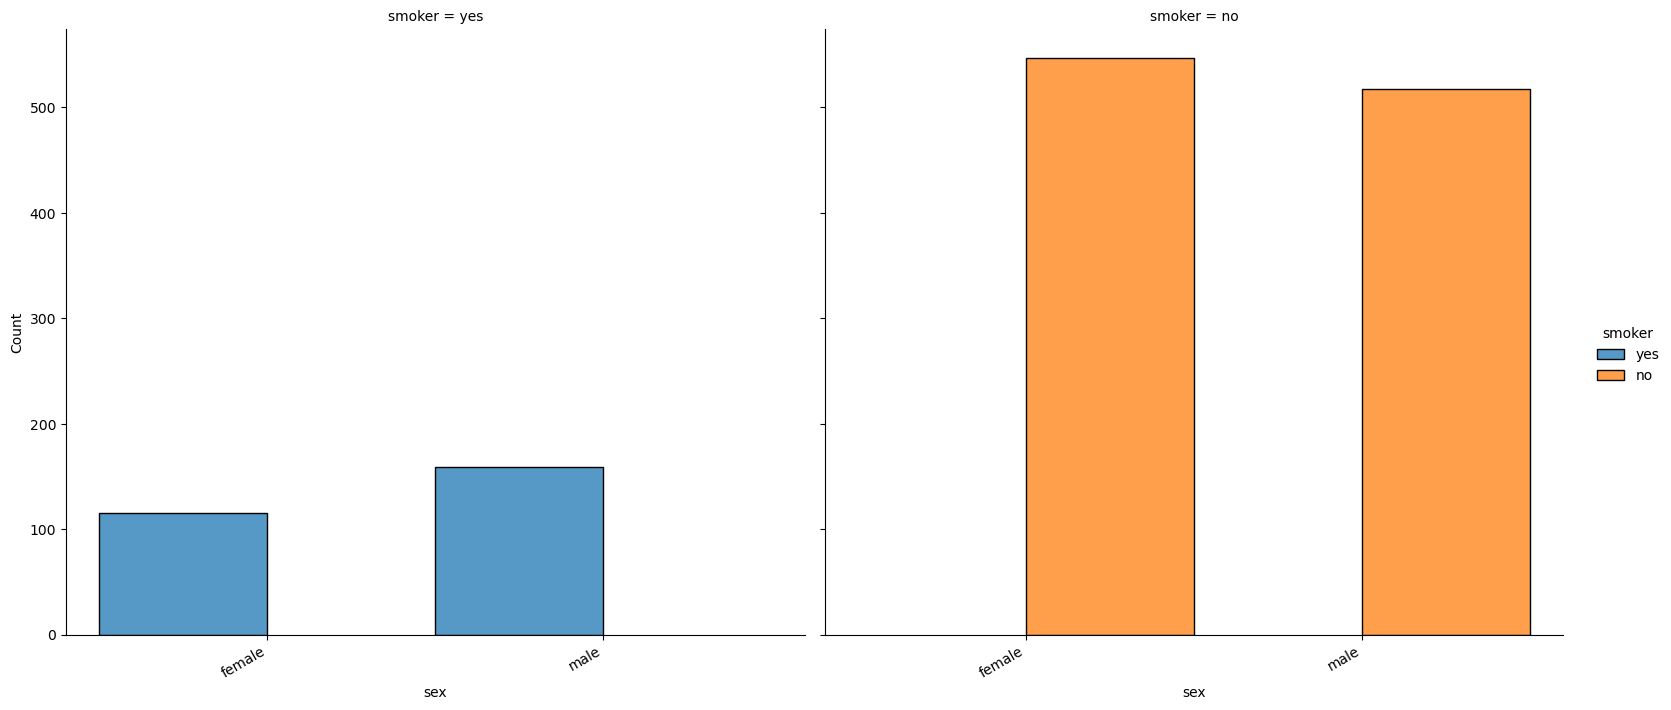

In [16]:
sns.displot(premium_df, x="sex", hue="smoker", multiple="dodge",col='smoker',height=8,aspect=1)
fig = plt.gcf()
fig.autofmt_xdate()


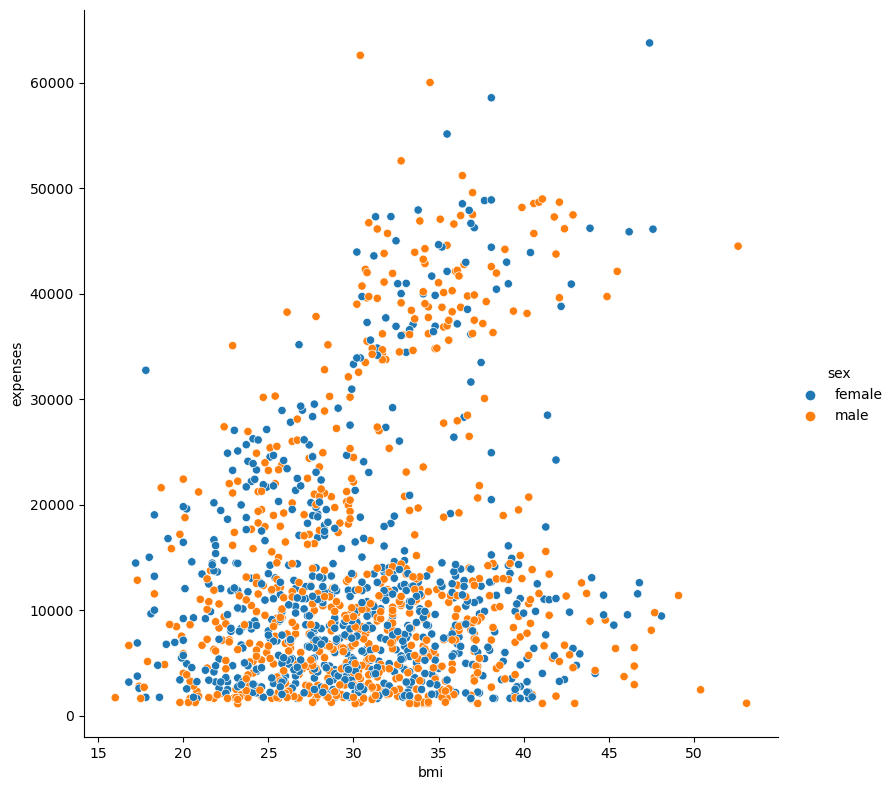

In [17]:
sns.pairplot(data=premium_df,x_vars="bmi", hue="sex",y_vars='expenses',height=8,aspect=1)
plt.show()

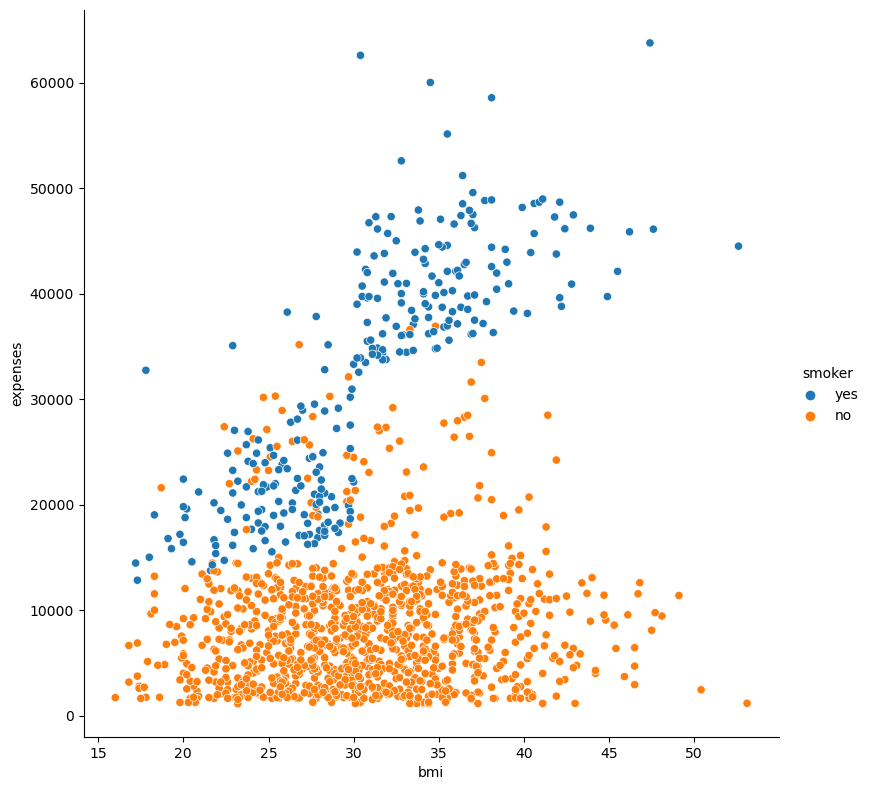

In [18]:
sns.pairplot(data=premium_df,x_vars="bmi", hue="smoker",y_vars='expenses',height=8,aspect=1)
plt.show()

### Data preprocessing

In [19]:
## now converting the categorical data into numerical data by using one hot encoding
#premium_df['sex'] = premium_df['sex'].astype('category')
#premium_df['sex'] = premium_df['sex'].cat.codes
#premium_df.head()

#encoder = OneHotEncoder(sparse=False, drop='first')

In [20]:
premium_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [21]:
#premium_df['smoker'] = premium_df['smoker'].astype('category')
#premium_df['smoker'] = premium_df['smoker'].cat.codes
#premium_df.head()

!pip install jsonify

In [22]:
premium_df = pd.get_dummies(premium_df, drop_first=True)


<Axes: >

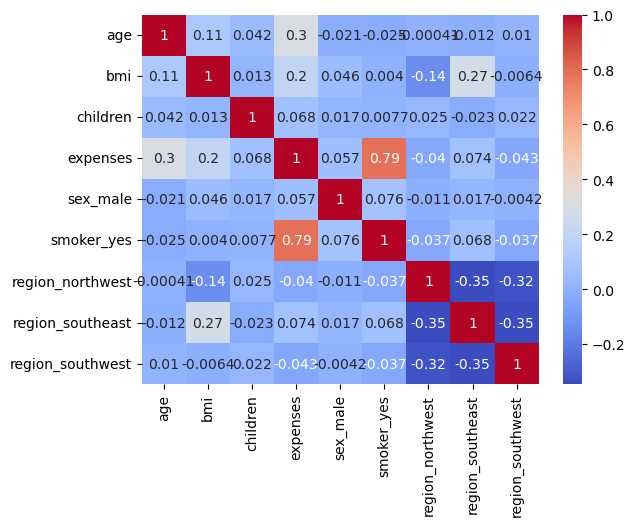

In [23]:
sns.heatmap(premium_df.corr(), annot=True, cmap='coolwarm')

In [24]:
x = premium_df.drop('expenses',axis=1)
y = premium_df['expenses']
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,1,0,1,0,0
1334,18,31.9,0,0,0,0,0,0
1335,18,36.9,0,0,0,0,1,0
1336,21,25.8,0,0,0,0,0,1


In [25]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split

# X represents your feature matrix, and y represents your target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model building start

In [26]:
# Model 1
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
modelRFR = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRFR.fit(X_train, y_train)

# Make predictions
y_pred_Rfr = modelRFR.predict(X_test)

In [27]:
r2_modelRFR = r2_score(y_test, y_pred_Rfr)
r2_modelRFR

0.8639618226426037

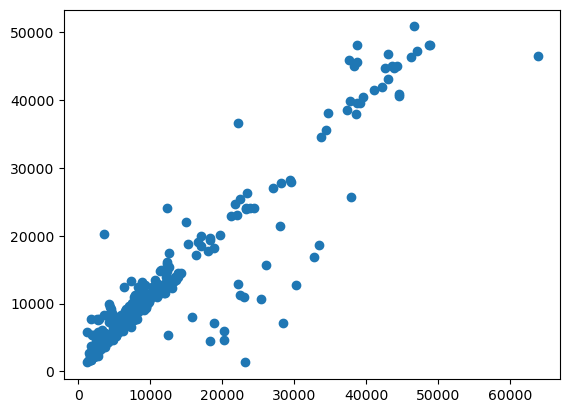

In [28]:
plt.scatter(y_test, y_pred_Rfr)

In [29]:
# Model 2
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_Lr = LinearRegression()

# Fit the model to the data
model_Lr.fit(X_train, y_train)

# Make predictions
y_pred = model_Lr.predict(X_test)

In [30]:
r2_Lr = r2_score(y_test, y_pred)
r2_Lr

0.7835726930039906

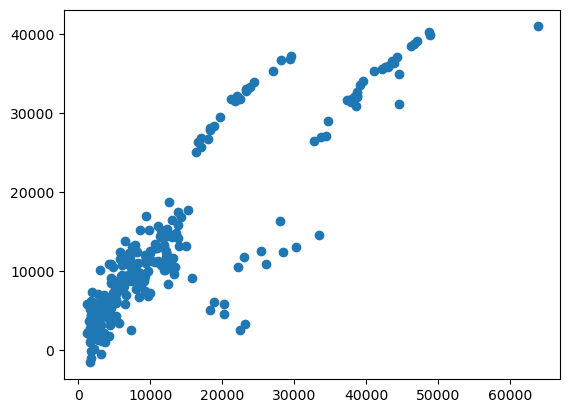

In [31]:
plt.scatter(y_test, y_pred)

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'oob_score' : [True,False]
}

In [33]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(estimator=modelRFR, param_grid=param_grid, 
                           #scoring='neg_mean_squared_error', cv=5)
#grid_search.fit(X_train, y_train)

In [34]:
#best_rf = grid_search.best_estimator_
#best_params = grid_search.best_params_

In [35]:
#best_params

#{'max_depth': 10,
 #'min_samples_leaf': 4,
 #'min_samples_split': 10,
 #'n_estimators': 100}

In [36]:
# Model 2.1 with hyperparameter tuning

# Create a Random Forest Regression model
modelHyper = RandomForestRegressor(max_depth = 10,
 min_samples_leaf = 4,
 min_samples_split= 10,
 n_estimators= 100)

# Fit the model to the data
modelHyper.fit(X_train, y_train)

# Make predictions
y_pred_hyper = modelHyper.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

r2_modelHyper = r2_score(y_test, y_pred_hyper)
r2_modelHyper

0.8795183409997064

In [38]:
X_test.shape

(268, 8)

In [39]:
# Calculate the R-squared score
r2_modelHyper

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - 0.8770347799399698) * (268 - 1) / (268 - 8 - 1)

print("R-squared:", r2_modelHyper)
print("Adjusted R-squared:", adjusted_r2)

R-squared: 0.8795183409997064
Adjusted R-squared: 0.8732366264246021


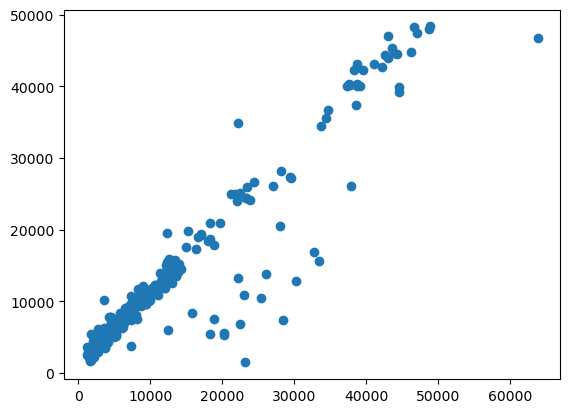

In [40]:
plt.scatter(y_test, y_pred_hyper)

In [41]:
# Model 3
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf


In [42]:
reg_model = smf.OLS(endog = y_train, exog=X_train).fit()

In [43]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              903.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:08:33   Log-Likelihood:                         -10900.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1062   BIC:                                  2.186e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                204.7318     13.219     15.487      0.000     178.793     230.671
bmi                 64.6491     21.211      3.048      0.002      23.028     106.270
children           220.2041    161.460      1.364      0.173     -96.612     537.020
sex_male          -628.4504    391.219     -1.606      0.108   -1396.100     139.199
smoker_yes        2.312e+04    488.077     47.376      0.000    2.22e+04    2.41e+04
region_northwest -1572.8944    552.361     -2.848      0.004   -2656.737    -489.052
region_southeast  -895.1221    567.455     -1.577      0.115   -2008.582     218.338
region_southwest -1673.7486    556.653     -3.007      0.003   -2766.014    -581.484
==============================================================================
Omnibus:                      218.178   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.089
Skew:                           1.120   Prob(JB):                    3.79e-107
Kurtosis:                       5.444   Cond. No.                         205.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

r2_gbr = r2_score(y_test, y_pred_gbr)
r2_gbr


0.8794657220917206

In [45]:
yoo = pd.DataFrame([[42,1,22,2,1,0,0,2]])
yo = gbr.predict(yoo)

yo

array([18972.29386496])

In [46]:
x.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [62]:

import pickle

In [63]:
#joblib.dump(gbr, 'D:\only projects\Machine learning projects\Premium_insurance\Deployment\gbr.pkl')
pickle.dump(gbr , open('D:\only projects\Machine learning projects\Premium_insurance\Deployment\gbr.pkl' , 'wb'))

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 0.5],
    'subsample': [0.8, 0.9, 1.0],
    'learning_rate' : [0.01,0.05,0.1,0.2,0.3]
}



from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

In [53]:
reg = GradientBoostingRegressor(subsample= 0.8,
 n_estimators= 300,
 min_samples_split= 5,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 4,
 learning_rate= 0.1)

reg.fit(X_train, y_train)

# Make predictions
y_pred_reg = reg.predict(X_test)

r2_reg = r2_score(y_test, y_pred_reg)
r2_reg


0.8599648251696742

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# We test the model with the scaled data but the R2_score get decreased so we go with the default data value

In [55]:
# Model 4
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
model_Dt = DecisionTreeRegressor()

# Fit the model to the data
model_Dt.fit(X_train, y_train)

# Make predictions
y_pred_Dt = model_Dt.predict(X_test)

In [56]:
r2_DT = r2_score(y_test, y_pred_Dt)
r2_DT

0.7165625942701398

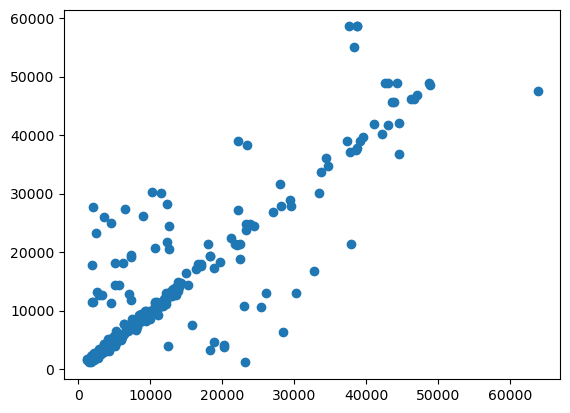

In [57]:
plt.scatter(y_test, y_pred_Dt)

In [58]:
# Now we checking the important fearture in RandomforestRegressor 
modelHyper.feature_importances_

array([0.12687519, 0.19137309, 0.01164994, 0.00291096, 0.66159302,
       0.00155726, 0.0020511 , 0.00198945])

In [59]:
pd.DataFrame(index=x.columns, data=modelHyper.feature_importances_, columns = ['Feature Importance'])

,Feature Importance
age,0.126875
bmi,0.191373
children,0.011650
sex_male,0.002911
smoker_yes,0.661593
region_northwest,0.001557
region_southeast,0.002051
region_southwest,0.001989


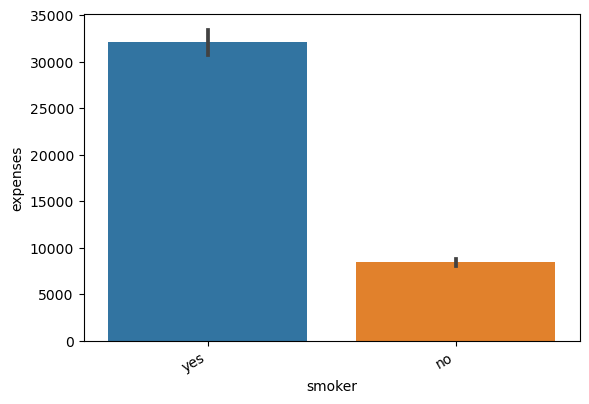

In [60]:
sns.barplot(df, x="smoker", y='expenses')
fig = plt.gcf()
fig.autofmt_xdate()

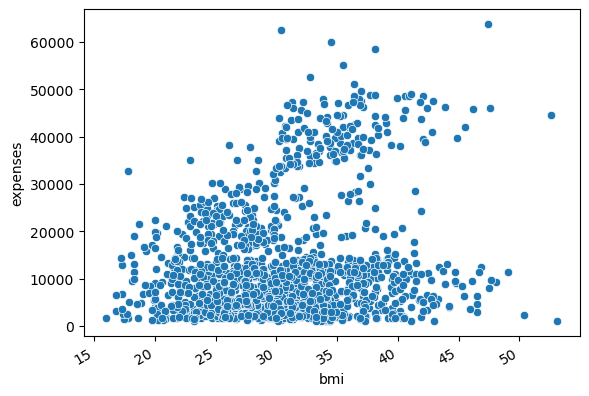

In [61]:
sns.scatterplot(df, x="bmi", y='expenses')
fig = plt.gcf()
fig.autofmt_xdate()